## Capstone- Cancer Histopathology: Simple Models

Dataset:
- A. Borkowski, "Lung and Colon Cancer Histopathological Images", Kaggle.com, 2020. [Online]. Available: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images. [Accessed: 30- Jul- 2022].

Sources:
- Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Image Labels:
- Lung benign tissue: 3
- Lung adenocarcinoma: 2
- Lung squamous cell carcinoma: 4
- Colon adenocarcinoma: 0
- Colon benign tissue: 1

### Import Libraries

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
from pathlib import Path
import time
import math

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [2]:
import PIL
from PIL import Image
import glob
import cv2
import os, os.path
from numpy import asarray

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from IPython.display import display, HTML
import pymongo
from pymongo import MongoClient
import io
from bson.binary import Binary

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import plot_confusion_matrix
from simple_colors import *
from sklearn.metrics import f1_score

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

import import_ipynb
import cancerHistopath13_functions
from cancerHistopath13_functions import show_summary_report, svcRocPrecisionRecall
from cancerHistopath13_functions import probaRocPrecisionRecall, testRocPrecisionRecall, calcRocAuc
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
# from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from itertools import cycle

importing Jupyter notebook from cancerHistopath13_functions.ipynb


In [4]:
# dfData= pd.read_csv("pcaDataset.csv")
dfData= pd.read_csv("pcaDataset04.csv")

In [5]:
dfData.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [6]:
dfData.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,-10.386038,-4.017631,-0.357372,-1.250835,-2.144264,5.783551,-1.196920,1.465510,-0.508288,2.378150,...,-0.425177,-1.220840,-0.357108,-0.040824,2.252175,0.532710,-0.475845,-0.355798,0.058165,0
1,-15.743757,-3.664482,-0.296815,-1.924469,0.755236,-0.308575,-2.122058,0.711255,0.253594,1.459081,...,-0.323564,0.219637,-0.851018,1.061086,0.340257,-0.239509,1.028901,0.598004,1.551454,0
2,-4.486821,12.497447,-0.392215,-1.011239,2.745016,2.081261,-0.774532,-1.553717,-7.416163,-0.768796,...,1.013568,0.181701,-1.876875,-0.058883,-0.261050,-0.726354,0.614560,0.243147,1.050536,3
3,-0.529217,-2.468542,-1.529118,-0.027930,1.781759,-2.139266,0.545642,-0.926475,2.544094,-0.229183,...,0.066902,-0.158810,0.017205,1.468970,-1.793922,1.172353,0.646077,-0.466358,0.683118,0
4,-1.887423,12.217950,1.305322,0.662923,1.209968,-1.872509,-1.472102,2.988750,0.041355,2.071237,...,-0.932849,-0.785604,1.833534,0.645850,0.263929,-0.196678,-0.884208,-0.626668,-2.257778,3


In [7]:
dfData.shape

(25000, 101)

### Split the data into train and test sets

In [8]:
predictor_columns= [c for c in dfData.columns if c != 'target']

In [9]:
X= pd.DataFrame(dfData, columns= predictor_columns)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-10.386038,-4.017631,-0.357372,-1.250835,-2.144264,5.783551,-1.196920,1.465510,-0.508288,2.378150,...,-0.771041,-0.425177,-1.220840,-0.357108,-0.040824,2.252175,0.532710,-0.475845,-0.355798,0.058165
1,-15.743757,-3.664482,-0.296815,-1.924469,0.755236,-0.308575,-2.122058,0.711255,0.253594,1.459081,...,1.096240,-0.323564,0.219637,-0.851018,1.061086,0.340257,-0.239509,1.028901,0.598004,1.551454
2,-4.486821,12.497447,-0.392215,-1.011239,2.745016,2.081261,-0.774532,-1.553717,-7.416163,-0.768796,...,-0.588300,1.013568,0.181701,-1.876875,-0.058883,-0.261050,-0.726354,0.614560,0.243147,1.050536
3,-0.529217,-2.468542,-1.529118,-0.027930,1.781759,-2.139266,0.545642,-0.926475,2.544094,-0.229183,...,0.120040,0.066902,-0.158810,0.017205,1.468970,-1.793922,1.172353,0.646077,-0.466358,0.683118
4,-1.887423,12.217950,1.305322,0.662923,1.209968,-1.872509,-1.472102,2.988750,0.041355,2.071237,...,-0.561078,-0.932849,-0.785604,1.833534,0.645850,0.263929,-0.196678,-0.884208,-0.626668,-2.257778


In [10]:
X.shape

(25000, 100)

In [11]:
y= dfData['target']
y[0:10]

0    0
1    0
2    3
3    0
4    3
5    0
6    4
7    1
8    3
9    3
Name: target, dtype: int64

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state= 42)

### Hyper-Parameters

In [13]:
np.random.seed(42)
log01= LogisticRegression(solver = 'lbfgs', max_iter = 100, C= 4, multi_class= 'auto')
svc01= LinearSVC(C= 1)
gradBst01= GradientBoostingClassifier(init= log01)

### Optimal Parameters

In [14]:
# %%time
# lr_params= {
#     'penalty': ['l1', 'l2'],
#     'C': [1, 2, 4, 6, 8, 10, 20, 50, 100]
# }

# log= LogisticRegression(solver= 'lbfgs', max_iter= 100, random_state= 42)
# reg= GridSearchCV(log, param_grid= lr_params)
# regMod= reg.fit(X_train, y_train)
# print(regMod)
# sorted(regMod.cv_results_.keys())
# regMod.cv_results_
# print(regMod.best_estimator_)
# regMod.best_score_

In [15]:
# %%time
# svc_params= {
#     'C': [1, 2, 4, 5]
# }

# svc= LinearSVC(random_state= 42)
# clf= GridSearchCV(svc, svc_params)
# clfMod= clf.fit(X_train, y_train)
# print(clfMod)
# sorted(clfMod.cv_results_.keys())
# clfMod.cv_results_
# print(clfMod.best_estimator_)
# clfMod.best_score_

### Verify and Evaluate the Training Model with Hyper-Parameters

In [16]:
modelTag= ['LOGREG', 'SVC', 'GRADBST']
imageTag= []
for i in range(5, 20):
    if (i <= 9):
        img= f'image0{i}'
        imageTag.append(img)
    else:
        img= f'image{i}'
        imageTag.append(img)
imageTag

['image05',
 'image06',
 'image07',
 'image08',
 'image09',
 'image10',
 'image11',
 'image12',
 'image13',
 'image14',
 'image15',
 'image16',
 'image17',
 'image18',
 'image19']

In [17]:
## helper function
def train_model(classifier, feature_vector_train, label, feature_vector_valid, testLabel):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions= classifier.predict(feature_vector_valid)
    predictProba= classifier.predict_proba(feature_vector_valid)
    accScore= accuracy_score(predictions, testLabel)
    return [accScore, predictions, predictProba]

In [18]:
def svc_train_model(classifier, feature_vector_train, label, feature_vector_valid, testLabel):
    # fit the training dataset on the classifier
    calibrated_clf = CalibratedClassifierCV(base_estimator= classifier)
    calibrated_clf.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions= calibrated_clf.predict(feature_vector_valid)
    predictProba= calibrated_clf.predict_proba(feature_vector_valid)
    
    accScore= accuracy_score(predictions, testLabel)
    return [accScore, predictions, predictProba]

### Logistic Regression

#### Accuracy Score

In [19]:
%%time
tic01= time.time()
logAccuracy= train_model(log01, X_train, y_train, X_test, y_test)
print('Logistc Regression : %.4f\n' % logAccuracy[0])
toc01= time.time()
runTimeLog= (toc01-tic01)*1000

Logistc Regression : 0.7665

CPU times: total: 4.58 s
Wall time: 959 ms


#### Confusion Matrix

In [20]:
logClassReport= classification_report(y_test, logAccuracy[1])
print(logClassReport)

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1543
           1       0.76      0.81      0.78      1482
           2       0.68      0.63      0.66      1511
           3       0.97      0.94      0.95      1497
           4       0.70      0.75      0.73      1467

    accuracy                           0.77      7500
   macro avg       0.77      0.77      0.77      7500
weighted avg       0.77      0.77      0.77      7500



In [21]:
logClassReportDict= classification_report(y_test, logAccuracy[1], output_dict= True)
logClassReportDict['1']['precision']

0.7559598494353826

#### 5-fold cross validation

In [22]:
%%time
reg= log01
crossValScoreLog= cross_val_score(reg, X_train, y_train, cv=5)
meanAccLog= np.mean(crossValScoreLog)
print(crossValScoreLog, meanAccLog)

[0.76171429 0.75142857 0.77485714 0.752      0.76428571] 0.7608571428571429
CPU times: total: 15.5 s
Wall time: 3.88 s


In [23]:
print(logClassReportDict['macro avg'])

arr01= []
for i in logClassReportDict['macro avg']:
    logClassMetric= logClassReportDict['macro avg'][i]
    arr01.append(logClassMetric)

arr01.append('logisticRegression')
arr01.append(runTimeLog)
arr01.append(meanAccLog)
arr01

{'precision': 0.7677628189829022, 'recall': 0.7672023941748931, 'f1-score': 0.7668755204074544, 'support': 7500}


[0.7677628189829022,
 0.7672023941748931,
 0.7668755204074544,
 7500,
 'logisticRegression',
 959.3503475189209,
 0.7608571428571429]

Accuracy  : 0.7665 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision : 0.7678 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall    : 0.7672 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
f1-score  : 0.7669 [2 * (Precision * Recall)/ (Precision + Recall)]                    Best: 1, Worst: 0
ROC AUC   : 0.9454                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


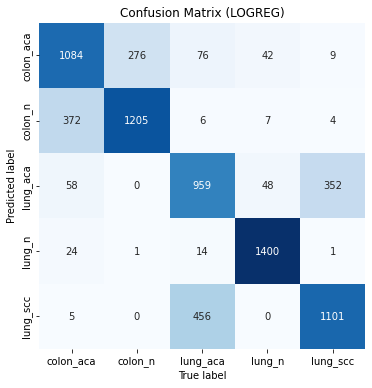

In [24]:
logModelReport= show_summary_report(y_test, logAccuracy[1], logAccuracy[2], modelTag[0], imageTag[0])

In [25]:
arrLog= []
for i in logModelReport:
    arrLog.append(i)

arrLog.append('logisticRegression')
arrLog.append(runTimeLog)
arrLog.append(meanAccLog)
arrLog

[0.7665333333333333,
 0.7677628189829022,
 0.7672023941748931,
 0.7668755204074544,
 0.9453809147469323,
 'logisticRegression',
 959.3503475189209,
 0.7608571428571429]

#### Precision/ Recall/ Roc-Curve

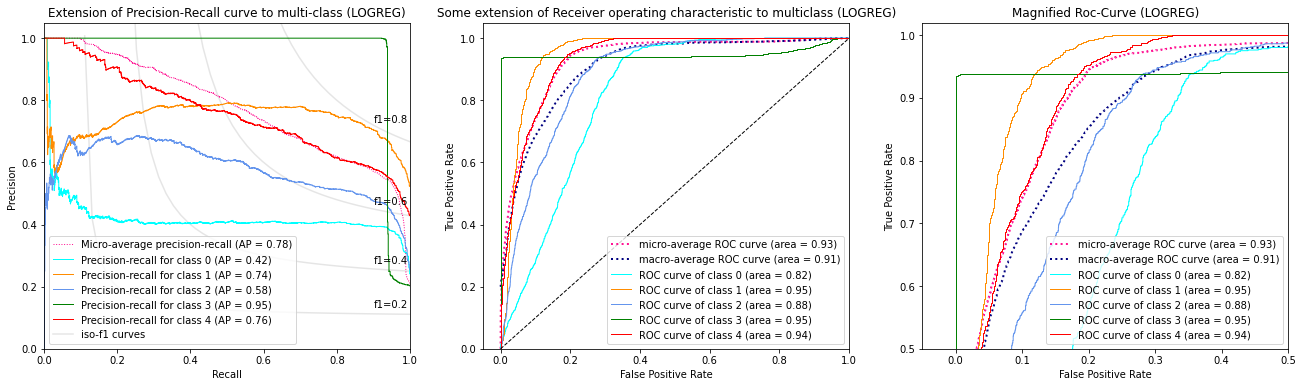

CPU times: total: 5.66 s
Wall time: 2.52 s


In [26]:
%%time
logPrecisionRecallData= probaRocPrecisionRecall(X, y, log01, modelTag[0], imageTag[1])

### Support Vector Machine

#### Accuracy Score

In [27]:
%%time
tic02= time.time()
# Support Vector Machine on Word Level TF IDF Vectors
svcAccuracy= svc_train_model(svc01, X_train, y_train, X_test, y_test)
print('SVC : %.4f\n' % svcAccuracy[0])
toc02= time.time()
runTimeSvc= (toc02-tic02)*1000

SVC : 0.7393

CPU times: total: 1min 32s
Wall time: 1min 32s


#### Confusion Matrix

Accuracy  : 0.7393 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision : 0.7435 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall    : 0.7412 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
f1-score  : 0.7362 [2 * (Precision * Recall)/ (Precision + Recall)]                    Best: 1, Worst: 0
ROC AUC   : 0.9273                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


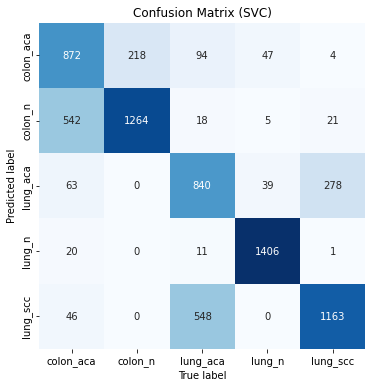

In [28]:
svcModelReport= show_summary_report(y_test, svcAccuracy[1], svcAccuracy[2], modelTag[1], imageTag[2])

#### 5-fold cross validation

In [29]:
%%time
reg= svc01
crossValScoreSvc= cross_val_score(reg, X_train, y_train, cv=5)
meanAccSvc= np.mean(crossValScoreSvc)
print(crossValScoreSvc, meanAccSvc)

[0.69314286 0.72485714 0.73685714 0.67542857 0.70885714] 0.7078285714285715
CPU times: total: 1min 33s
Wall time: 1min 33s


In [30]:
arrSvc= []
for i in svcModelReport:
    arrSvc.append(i)

arrSvc.append('supportVectorMachine')
arrSvc.append(runTimeSvc)
arrSvc.append(meanAccSvc)
arrSvc

[0.7393333333333333,
 0.7435022624383343,
 0.7411887397013763,
 0.7362417107122777,
 0.9272512856687056,
 'supportVectorMachine',
 92631.97469711304,
 0.7078285714285715]

#### Precision/ Recall/ Roc-Curve

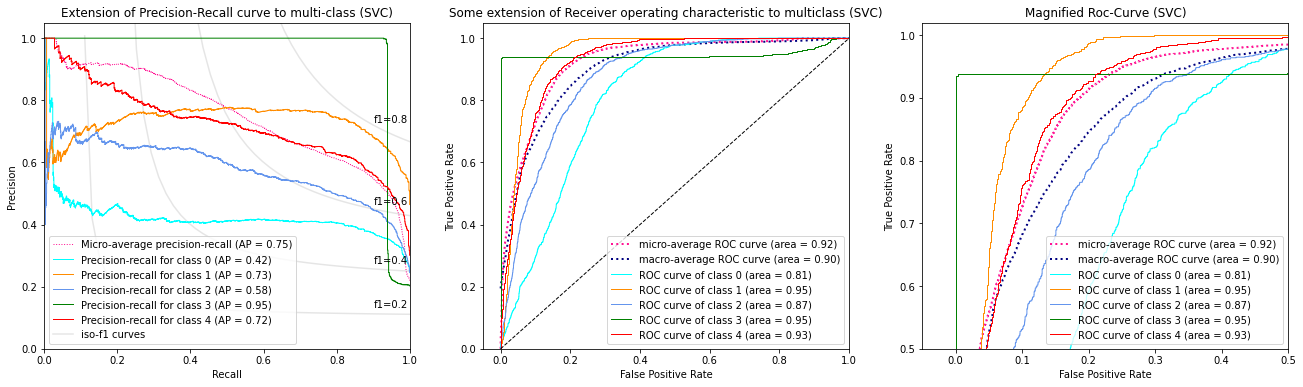

CPU times: total: 30 s
Wall time: 30 s


In [31]:
%%time
svcPrecisionRecallData= svcRocPrecisionRecall(X, y, svc01, modelTag[1], imageTag[3])

### Gradient Boosting

#### Accuracy Score

In [32]:
%%time
tic05= time.time()
# Gradient Boosting on Count Vectors
gradBstAccuracy = train_model(gradBst01, X_train, y_train, X_test, y_test)
print('GradBst : %.4f\n' % gradBstAccuracy[0])
toc05= time.time()
runTimeGradBst= (toc05-tic05)*1000

GradBst : 0.8841

CPU times: total: 5min 12s
Wall time: 5min 11s


#### Confusion Matrix

Accuracy  : 0.8841 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision : 0.8844 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall    : 0.8848 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
f1-score  : 0.8842 [2 * (Precision * Recall)/ (Precision + Recall)]                    Best: 1, Worst: 0
ROC AUC   : 0.9840                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


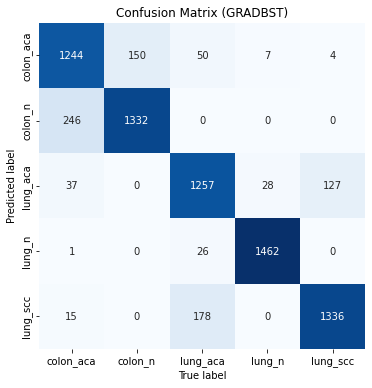

In [33]:
gradBstModelReport= show_summary_report(y_test, gradBstAccuracy[1], gradBstAccuracy[2], modelTag[2],
                                        imageTag[4])

#### 5-fold cross validation

In [34]:
reg= gradBst01
crossValScoreGradBst= cross_val_score(reg, X_train, y_train, cv=5)
meanAccGradBst= np.mean(crossValScoreGradBst)
print(crossValScoreGradBst, meanAccGradBst)

[0.882      0.88028571 0.89228571 0.87428571 0.89628571] 0.8850285714285715


In [35]:
arrGradBst= []
for i in gradBstModelReport:
    arrGradBst.append(i)

arrGradBst.append('gradientBoost')
arrGradBst.append(runTimeGradBst)
arrGradBst.append(meanAccGradBst)
arrGradBst

[0.8841333333333333,
 0.884444967783856,
 0.8848456990497571,
 0.8841782790254857,
 0.9839832219110445,
 'gradientBoost',
 311078.4418582916,
 0.8850285714285715]

#### Precision/ Recall/ Roc-Curve

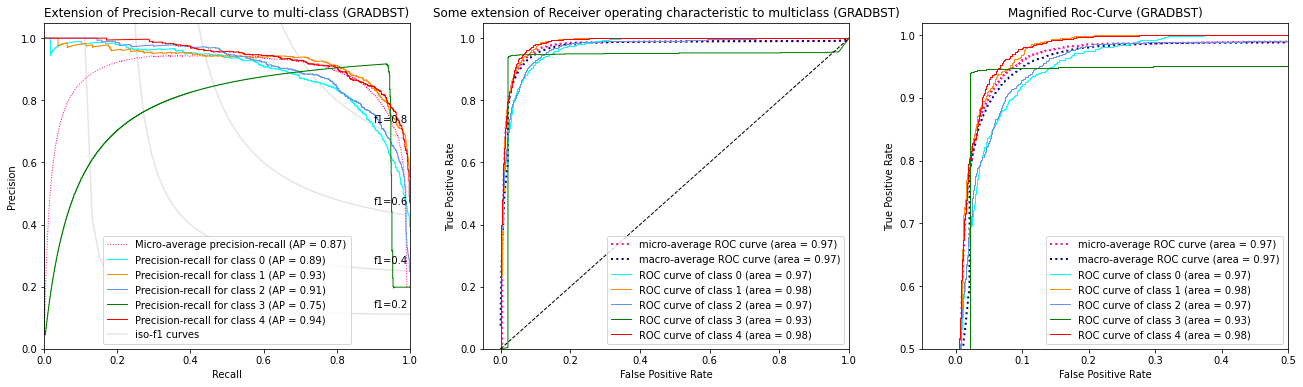

CPU times: total: 5min 41s
Wall time: 5min 38s


In [36]:
%%time
gradBstPrecisionRecallData= probaRocPrecisionRecall(X, y, gradBst01, modelTag[2], imageTag[5])

### Learning Curve

In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [38]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

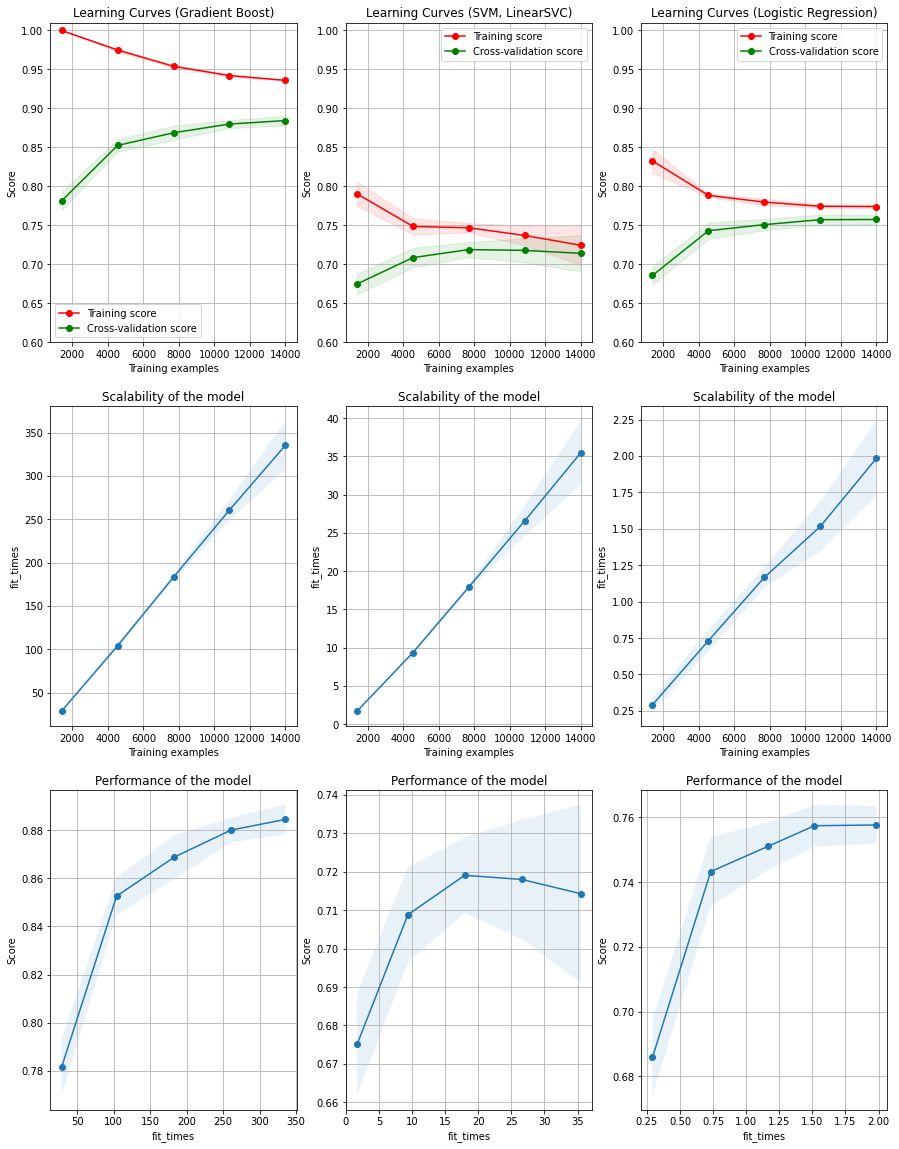

CPU times: total: 2.69 s
Wall time: 23min 13s


In [39]:
%%time
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

# X, y = load_digits(return_X_y=True)

title = "Learning Curves (Gradient Boost)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)

estimator = gradBst01
plot_learning_curve(
    estimator, title, X_train, y_train, axes= axes[:, 0], ylim= (0.6, 1.01), cv= cv, n_jobs= 4
)

# title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
title = r"Learning Curves (SVM, LinearSVC)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
# estimator = svm.SVC(kernel= 'rbf', gamma=0.001)
estimator = svc01
plot_learning_curve(
    estimator, title, X_train, y_train, axes= axes[:, 1], ylim= (0.6, 1.01), cv= cv, n_jobs= 4
)

title = "Learning Curves (Logistic Regression)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)

# estimator = LogisticRegression()
estimator = log01
plot_learning_curve(
    estimator, title, X_train, y_train, axes= axes[:, 2], ylim= (0.6, 1.01), cv= cv, n_jobs= 4
)

plt.savefig(f'{imageTag[6]}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

### Model Comparison

In [40]:
modelArr= []
modelArr.append(arrLog)
modelArr.append(arrSvc)
modelArr.append(arrGradBst)

modelArr

[[0.7656,
  0.766980024214289,
  0.7662604587225266,
  0.7659956138235112,
  0.9453757377119922,
  'logisticRegression',
  1144.6902751922607,
  0.7595428571428572],
 [0.7465333333333334,
  0.751486171785533,
  0.7483767916762905,
  0.7435416502691113,
  0.9267281050800344,
  'supportVectorMachine',
  94941.24102592468,
  0.7180000000000001],
 [0.8862666666666666,
  0.88665361766811,
  0.8869371748613097,
  0.8863712303101197,
  0.9839218289099586,
  'gradientBoost',
  291618.203163147,
  0.8862285714285715]]

In [41]:
comparisonCols= ['accuracy', 'precision', 'recall', 'f1-score', 'roc_auc', 'model', 'runtime_ms',
                 'meanAcc']

In [42]:
dfModCompare= pd.DataFrame(modelArr, columns= comparisonCols)
dfModCompare

,accuracy,precision,recall,f1-score,roc_auc,model,runtime_ms,meanAcc
0,0.765600,0.766980,0.766260,0.765996,0.945376,logisticRegression,1144.690275,0.759543
1,0.746533,0.751486,0.748377,0.743542,0.926728,supportVectorMachine,94941.241026,0.718000
2,0.886267,0.886654,0.886937,0.886371,0.983922,gradientBoost,291618.203163,0.886229


In [43]:
filepath = Path('modelComparison.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfModCompare.to_csv(filepath)

### Comparison Precision/ Recall/ Roc-Curve

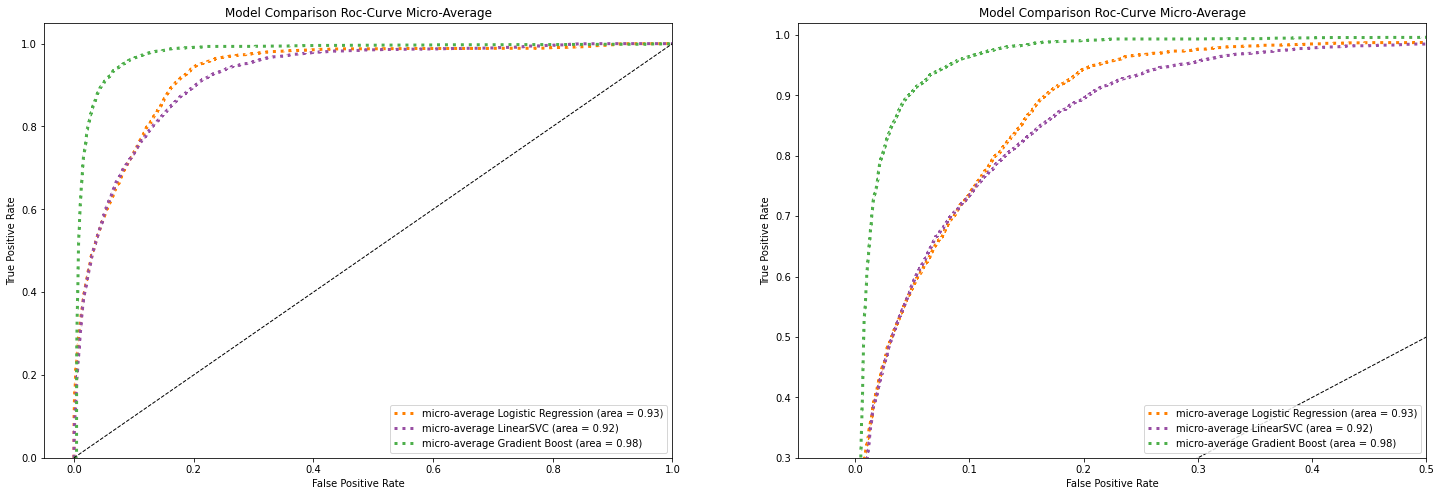

In [45]:
# Plot all ROC curves
fig, ax= plt.subplots(1, 2, figsize= (20, 8))
fig.subplots_adjust(left= 0.02, right= 0.98, wspace= 0.2)
#     plt.figure(figsize=(10, 7))
# colors = cycle(['deeppink', 'navy', 'darkorange', 'aqua'])
colors= ['#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#f781bf', '#a65628', '#e41a1c', '#ffff33']
lw= 1
for i in range(0, 2):
    ax[i].plot(
        logPrecisionRecallData[4],
        logPrecisionRecallData[5],
        label="micro-average Logistic Regression (area = {0:0.2f})".format(logPrecisionRecallData[6]),
        color= colors[0],
        linestyle=":",
        linewidth=3,
    )
    ax[i].plot(
        svcPrecisionRecallData[4],
        svcPrecisionRecallData[5],
        label="micro-average LinearSVC (area = {0:0.2f})".format(svcPrecisionRecallData[6]),
        color= colors[1],
        linestyle=":",
        linewidth=3,
    )
    ax[i].plot(
        gradBstPrecisionRecallData[4],
        gradBstPrecisionRecallData[5],
        label="micro-average Gradient Boost (area = {0:0.2f})".format(gradBstPrecisionRecallData[6]),
        color= colors[2],
        linestyle=":",
        linewidth=3,
    )
ax[0].plot([0, 1], [0, 1], "k--", lw= lw)
ax[0].set_xlim([-0.05, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("Model Comparison Roc-Curve Micro-Average")
ax[0].legend(loc="lower right")

ax[1].plot([0, 1], [0, 1], "k--", lw= lw)
ax[1].set_xlim([-0.05, 0.5])
ax[1].set_ylim([0.3, 1.02])
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].set_title("Model Comparison Roc-Curve Micro-Average")
ax[1].legend(loc="lower right")

plt.savefig(f'{imageTag[7]}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

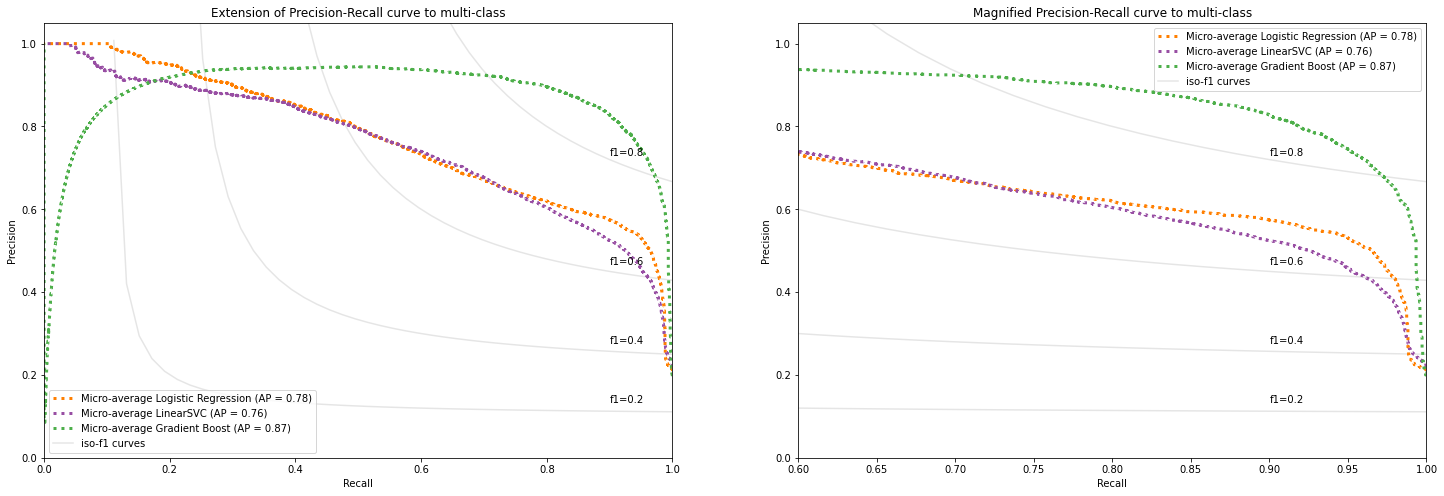

In [46]:
# plot
fig, ax= plt.subplots(1, 2, figsize= (20, 8))
fig.subplots_adjust(left= 0.02, right= 0.98, wspace= 0.2)
# colors= cycle(['deeppink', 'navy', 'darkorange', 'aqua', 'cornflowerblue'])
colors= ['#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#f781bf', '#a65628', '#e41a1c', '#ffff33']

# Precision/Recall
f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = ax[0].plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    ax[0].annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))
    (l,) = ax[1].plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    ax[1].annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

for i in range(0, 2):
#     print(i)
    display= PrecisionRecallDisplay(
        recall= logPrecisionRecallData[11],
        precision= logPrecisionRecallData[10],
        average_precision= logPrecisionRecallData[12],
    )
    display.plot(ax= ax[i], name="Micro-average Logistic Regression", color= colors[0], linewidth= 3,
                 linestyle=':')
    display= PrecisionRecallDisplay(
        recall= svcPrecisionRecallData[11],
        precision= svcPrecisionRecallData[10],
        average_precision= svcPrecisionRecallData[12],
    )
    display.plot(ax= ax[i], name="Micro-average LinearSVC", color= colors[1], linewidth= 3,
                 linestyle=':')
    display= PrecisionRecallDisplay(
        recall= gradBstPrecisionRecallData[11],
        precision= gradBstPrecisionRecallData[10],
        average_precision= gradBstPrecisionRecallData[12],
    )
    display.plot(ax= ax[i], name="Micro-average Gradient Boost", color= colors[2], linewidth= 3,
                 linestyle=':')

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].legend(handles=handles, labels=labels, loc="best")
ax[0].set_title(f'Extension of Precision-Recall curve to multi-class')

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
ax[1].set_xlim([0.6, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].legend(handles=handles, labels=labels, loc="best")
ax[1].set_title(f'Magnified Precision-Recall curve to multi-class')

plt.savefig(f'{imageTag[8]}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()